# 1. Data Exploration

## 1.1 Load and Inspect Data

In [51]:
# Import necessary libraries
import pandas as pd

# Load the dataset
file_path = 'online_retail_II.xlsx'  # Update with the correct path to your file
data = pd.read_excel(file_path)

# Display the first few rows to understand the data structure
data.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


## 1.2 Initial Data Summary

In [52]:
# Display summary information
data.info()

# Show basic statistics for numerical columns
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


,Quantity,InvoiceDate,Price,Customer ID
count,525461.000000,525461,525461.000000,417534.000000
mean,10.337667,2010-06-28 11:37:36.845017856,4.688834,15360.645478
min,-9600.000000,2009-12-01 07:45:00,-53594.360000,12346.000000
25%,1.000000,2010-03-21 12:20:00,1.250000,13983.000000
50%,3.000000,2010-07-06 09:51:00,2.100000,15311.000000
75%,10.000000,2010-10-15 12:45:00,4.210000,16799.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000
std,107.424110,NaN,146.126914,1680.811316


## 1.3 Check for Missing Values and Duplicates

In [53]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values per column:\n", missing_values)

# Check for duplicate rows
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")


Missing values per column:
 Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64
Number of duplicate rows: 6865


## 1.4 Data Cleaning

### Explanation of Data Cleaning Decisions

- **Description**: Missing values in `Description` were filled with "Unknown" as these entries likely represent cases where the item name was unavailable.
- **Customer ID**: Rows with missing `Customer ID` were removed to ensure the analysis focuses on identified customers. This is necessary for clustering and customer-level insights.
- **Duplicates**: Duplicate rows were removed to avoid redundancy and ensure each transaction is unique.


In [54]:
# Fill missing 'Description' values with 'Unknown'
data['Description'].fillna('Unknown', inplace=True)

# Drop rows with missing 'Customer ID' if customer-level analysis is needed
data = data.dropna(subset=['Customer ID'])

# Remove duplicate rows
data = data.drop_duplicates()

# Verify changes
print("Missing values after cleaning:\n", data.isnull().sum())
print(f"Number of rows after cleaning: {data.shape[0]}")


C:\Users\devsa\AppData\Local\Temp\ipykernel_16724\2442762016.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Description'].fillna('Unknown', inplace=True)


Missing values after cleaning:
 Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64
Number of rows after cleaning: 410763


## 1.5 Data Visualization

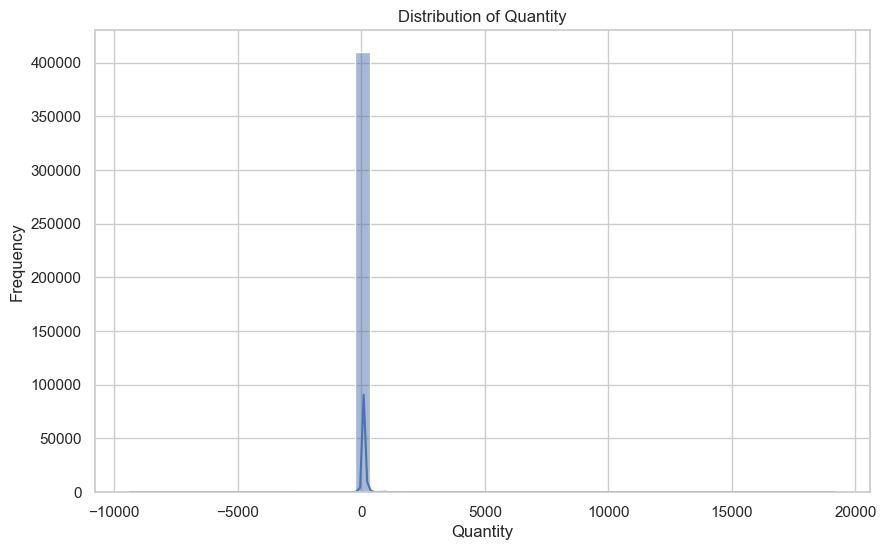

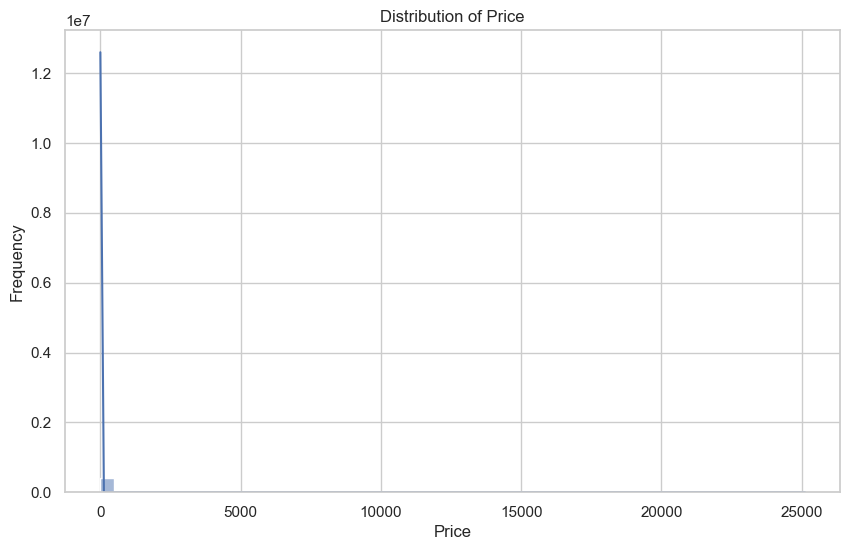

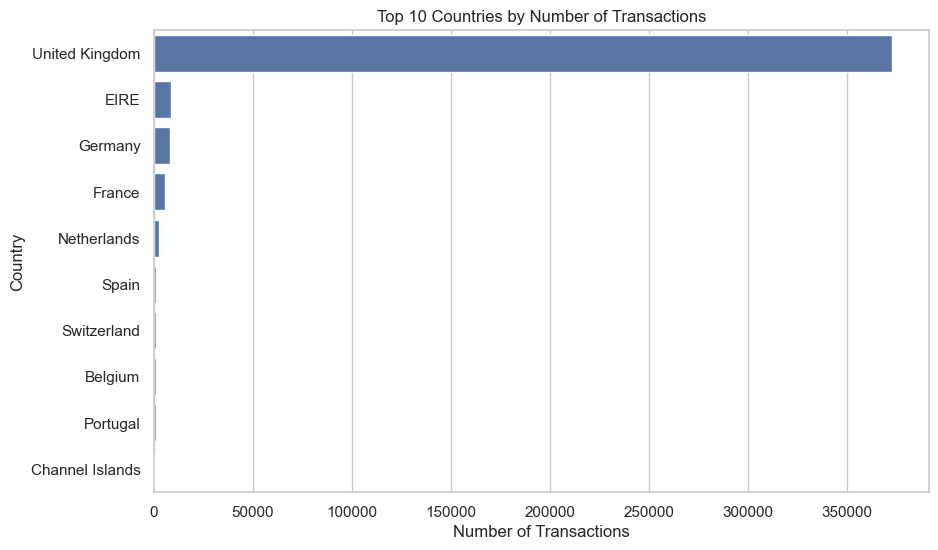

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the visual style
sns.set(style="whitegrid")

# 1. Quantity Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Quantity'], bins=50, kde=True)
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

# 2. Price Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Price'], bins=50, kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# 3. Top 10 Countries by Number of Transactions
top_countries = data['Country'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 10 Countries by Number of Transactions')
plt.xlabel('Number of Transactions')
plt.ylabel('Country')
plt.show()



## 1.6 Outlier Detection

### 1.6.1 Box Plot for Quantity and Price

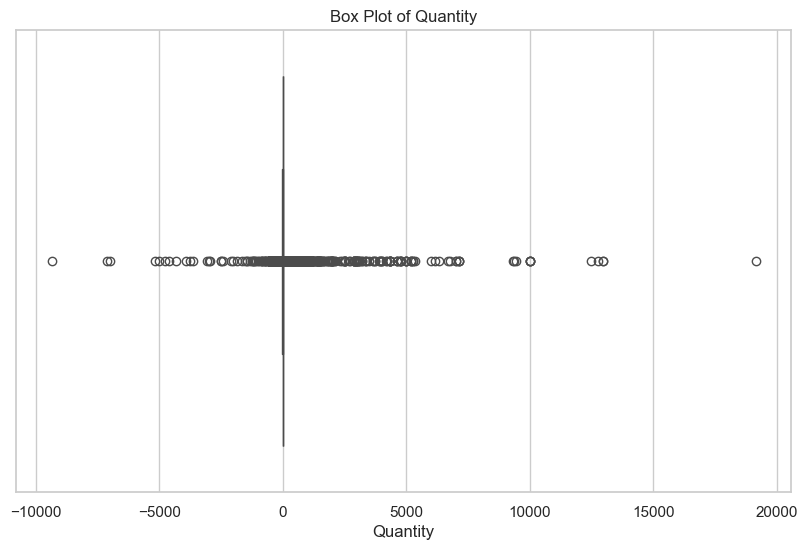

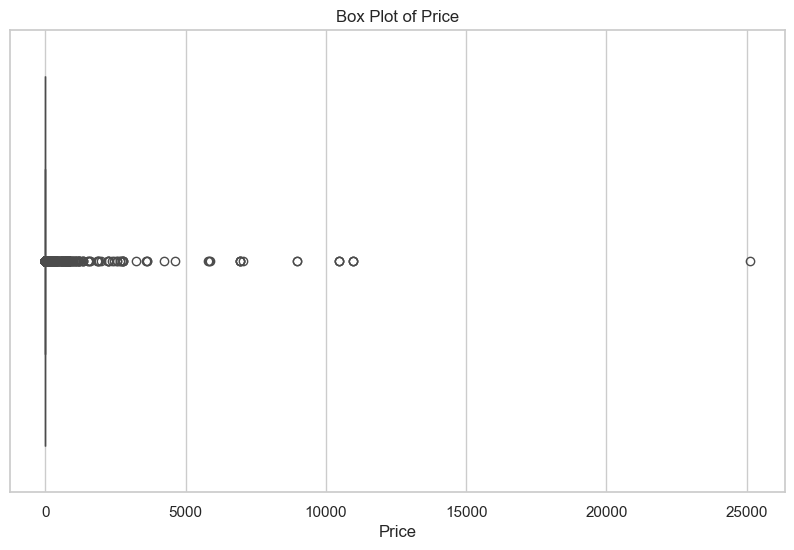

In [56]:
# Box plot for Quantity
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Quantity'])
plt.title('Box Plot of Quantity')
plt.xlabel('Quantity')
plt.show()

# Box plot for Price
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Price'])
plt.title('Box Plot of Price')
plt.xlabel('Price')
plt.show()


### 1.6.2 Calculate IQR and Identify Outliers

In [57]:
# Calculate IQR for Quantity
Q1_quantity = data['Quantity'].quantile(0.25)
Q3_quantity = data['Quantity'].quantile(0.75)
IQR_quantity = Q3_quantity - Q1_quantity
outliers_quantity = data[(data['Quantity'] < (Q1_quantity - 1.5 * IQR_quantity)) | 
                         (data['Quantity'] > (Q3_quantity + 1.5 * IQR_quantity))]

# Calculate IQR for Price
Q1_price = data['Price'].quantile(0.25)
Q3_price = data['Price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
outliers_price = data[(data['Price'] < (Q1_price - 1.5 * IQR_price)) | 
                      (data['Price'] > (Q3_price + 1.5 * IQR_price))]

# Print outlier counts and inspect first few rows
print(f"Number of Quantity outliers: {outliers_quantity.shape[0]}")
print(f"Number of Price outliers: {outliers_price.shape[0]}")

# Display the first few rows of each outlier dataset
outliers_quantity.head()
outliers_price.head()


Number of Quantity outliers: 27342
Number of Price outliers: 34703


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
22,489436,22194,BLACK DINER WALL CLOCK,2,2009-12-01 09:06:00,8.50,13078.0,United Kingdom
35,489437,21360,JOY LARGE WOOD LETTERS,1,2009-12-01 09:08:00,9.95,15362.0,United Kingdom
38,489437,35400,WOODEN BOX ADVENT CALENDAR,2,2009-12-01 09:08:00,8.95,15362.0,United Kingdom
88,489439,20749,ASSORTED COLOUR MINI CASES,2,2009-12-01 09:28:00,7.95,12682.0,France
89,489439,POST,POSTAGE,3,2009-12-01 09:28:00,18.00,12682.0,France


### 1.6.3 Handling Outliers

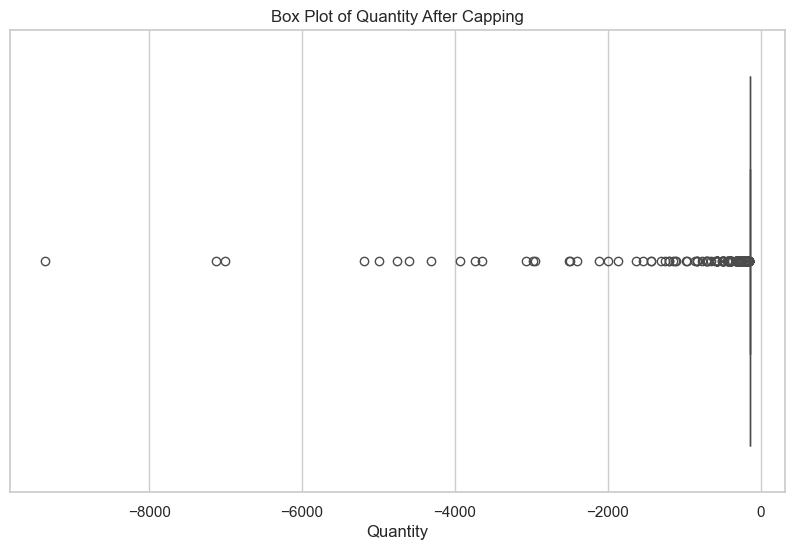

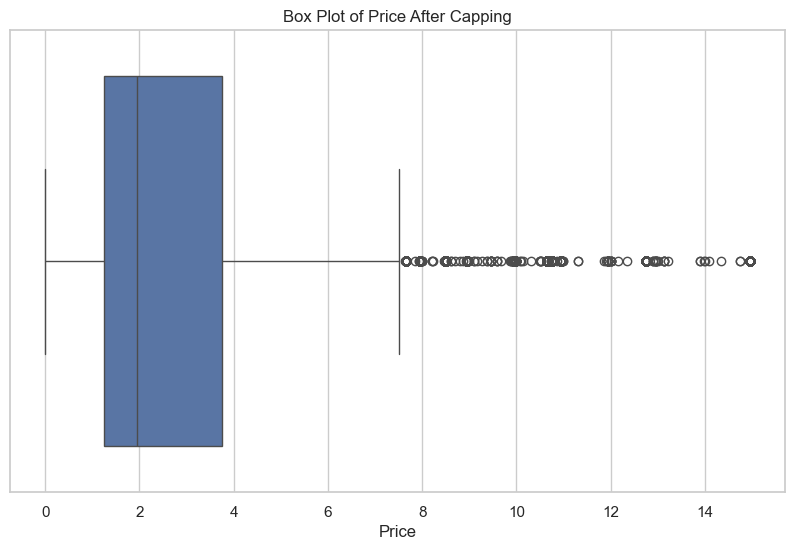

In [58]:
# Cap extreme Quantity outliers (retain negative values but cap high values)
upper_limit_quantity = data['Quantity'].quantile(0.99)  # 99th percentile as threshold
data['Quantity'] = data['Quantity'].clip(upper=-upper_limit_quantity, lower=None)

# Cap extreme Price outliers
upper_limit_price = data['Price'].quantile(0.99)  # 99th percentile as threshold
data['Price'] = data['Price'].clip(upper=upper_limit_price, lower=None)

# Verify changes by re-checking for outliers after capping
# Box plot for Quantity after capping
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Quantity'])
plt.title('Box Plot of Quantity After Capping')
plt.xlabel('Quantity')
plt.show()

# Box plot for Price after capping
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Price'])
plt.title('Box Plot of Price After Capping')
plt.xlabel('Price')
plt.show()


# 2. Feature Engineering

### 2.1 Create Total Purchase Amount
`TotalAmount` was calculated as `Quantity * Price` for each transaction, representing the total value spent in each transaction. This feature is essential for understanding the purchasing power and behavior of each customer.


In [59]:
data['TotalAmount'] = data['Quantity'] * data['Price']

### 2.2 Extract Day and Hour Features
Day and hour were extracted from `InvoiceDate` to analyze potential time-based patterns in customer purchases.


In [60]:
data['DayOfWeek'] = data['InvoiceDate'].dt.dayofweek  # Monday=0, Sunday=6
data['HourOfDay'] = data['InvoiceDate'].dt.hour

### 2.3 Customer-Level Aggregates
We calculated two customer-level aggregates: `TotalPurchasePerCustomer` and `AvgTransactionAmountPerCustomer`. These features help in clustering customers based on their purchasing behavior and average transaction size.


In [61]:
# Total Purchases per Customer
customer_total_purchase = data.groupby('Customer ID')['TotalAmount'].sum().rename('TotalPurchasePerCustomer')
# Average Transaction Amount per Customer
customer_avg_transaction = data.groupby('Customer ID')['TotalAmount'].mean().rename('AvgTransactionAmountPerCustomer')

# Merge these customer-level aggregates back into the main dataframe
data = data.merge(customer_total_purchase, on='Customer ID', how='left')
data = data.merge(customer_avg_transaction, on='Customer ID', how='left')

# Verify the new features
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalAmount,DayOfWeek,HourOfDay,TotalPurchasePerCustomer,AvgTransactionAmountPerCustomer
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,-144,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,-1000.8,1,7,-32544.0,-516.571429
1,489434,79323P,PINK CHERRY LIGHTS,-144,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,-972.0,1,7,-32544.0,-516.571429
2,489434,79323W,WHITE CHERRY LIGHTS,-144,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,-972.0,1,7,-32544.0,-516.571429
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",-144,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,-302.4,1,7,-32544.0,-516.571429
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,-144,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,-180.0,1,7,-32544.0,-516.571429


# 3. Model Implementation and Comparisons

## 3.1 Standardize Features

In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

# 1. Select relevant features for clustering (e.g., TotalPurchasePerCustomer, AvgTransactionAmountPerCustomer)
features = data[['TotalPurchasePerCustomer', 'AvgTransactionAmountPerCustomer']].dropna()


## 3.2 Determine Optimal Clusters (Elbow Method)

In [63]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


## 3.3 K-Means Clustering with K = 4

In [64]:
inertia = []
cluster_range = range(1, 11)
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

## 3.4 Cluster Visualization

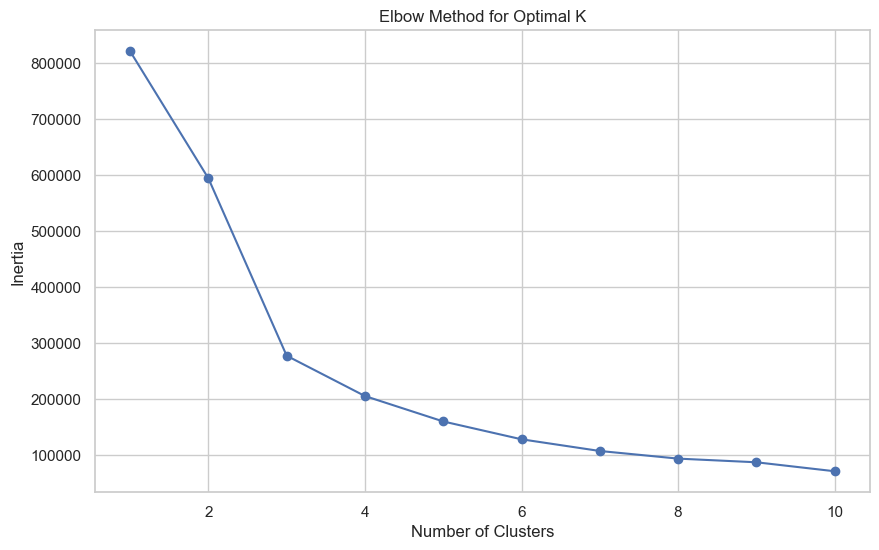

In [65]:
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

## 3.5 Implementing K-Means Clustering with K = 4

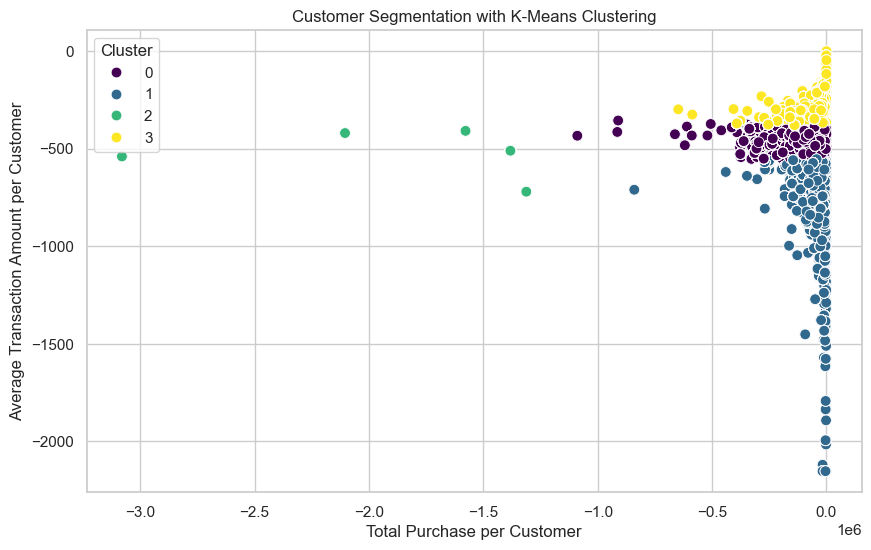

In [66]:
# Fit K-Means with the chosen number of clusters (K=4)
kmeans = KMeans(n_clusters=4, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

# Add the cluster label to the original feature data for visualization
features['Cluster'] = data['Cluster'].values

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=features['TotalPurchasePerCustomer'], y=features['AvgTransactionAmountPerCustomer'],
                hue=features['Cluster'], palette='viridis', s=60)
plt.title('Customer Segmentation with K-Means Clustering')
plt.xlabel('Total Purchase per Customer')
plt.ylabel('Average Transaction Amount per Customer')
plt.legend(title='Cluster')
plt.show()


# 4 Model Evaluation

### 4.1 Inertia and Silhouette Score

- **Inertia**: Inertia, or within-cluster sum of squares, measures how tightly the data points are packed within each cluster. Lower inertia indicates better clustering compactness.
- **Silhouette Score**: Although computationally intensive for large datasets, the silhouette score is an alternative measure that considers both compactness and separation between clusters.


In [67]:
# Inertia (Within-cluster sum of squares) for the K-Means model with 4 clusters
print(f"Inertia for K-Means Clustering (K=4): {kmeans.inertia_:.2f}")

Inertia for K-Means Clustering (K=4): 205216.66


## 4.2 Visualize Cluster Centroids

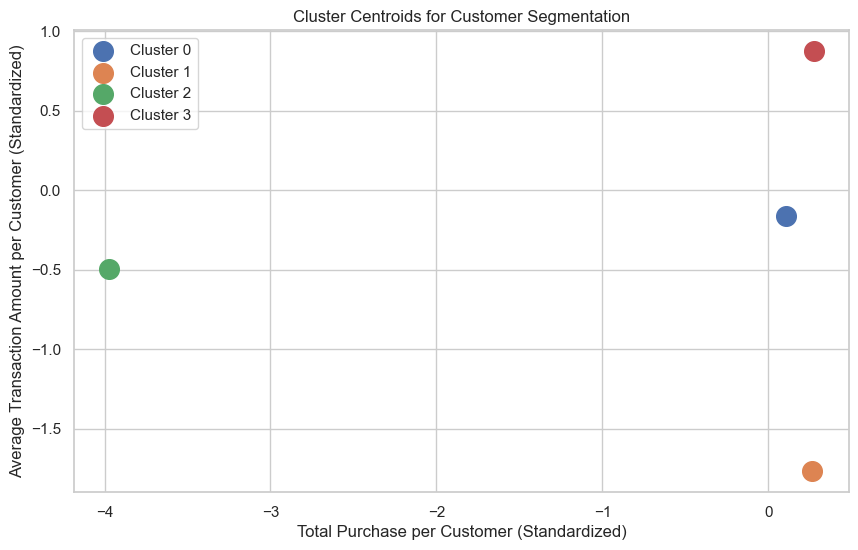

In [68]:
# Calculate the centroids for each cluster
centroids = kmeans.cluster_centers_

# Plot the centroids for Total Purchase and Average Transaction Amount
plt.figure(figsize=(10, 6))
for i in range(len(centroids)):
    plt.scatter(centroids[i][0], centroids[i][1], marker='o', s=200, label=f'Cluster {i}')
plt.title('Cluster Centroids for Customer Segmentation')
plt.xlabel('Total Purchase per Customer (Standardized)')
plt.ylabel('Average Transaction Amount per Customer (Standardized)')
plt.legend()
plt.show()


## 4.3 Histograms by Cluster

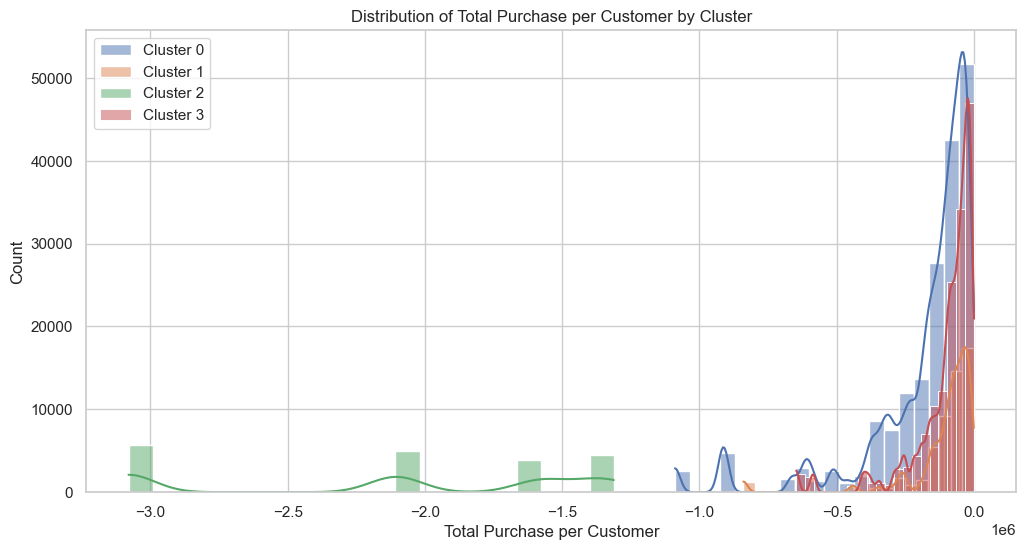

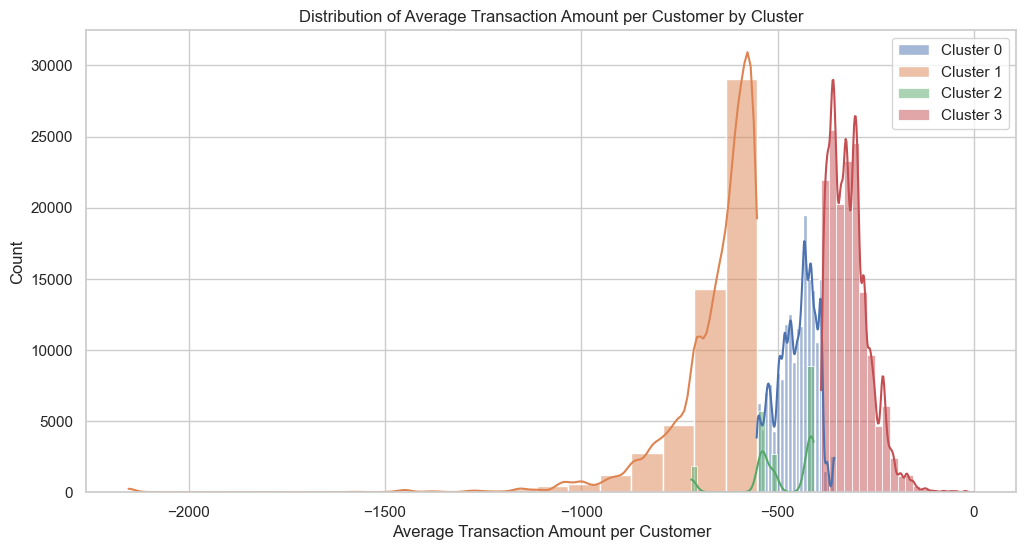

In [69]:
# Plot histograms for Total Purchase per Customer by Cluster
plt.figure(figsize=(12, 6))
for i in range(4):
    sns.histplot(data[data['Cluster'] == i]['TotalPurchasePerCustomer'], kde=True, label=f'Cluster {i}', bins=20)
plt.title('Distribution of Total Purchase per Customer by Cluster')
plt.xlabel('Total Purchase per Customer')
plt.legend()
plt.show()

# Plot histograms for Average Transaction Amount per Customer by Cluster
plt.figure(figsize=(12, 6))
for i in range(4):
    sns.histplot(data[data['Cluster'] == i]['AvgTransactionAmountPerCustomer'], kde=True, label=f'Cluster {i}', bins=20)
plt.title('Distribution of Average Transaction Amount per Customer by Cluster')
plt.xlabel('Average Transaction Amount per Customer')
plt.legend()
plt.show()


## 4.4 Cluster Size Visualization

C:\Users\devsa\AppData\Local\Temp\ipykernel_16724\1690355658.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')


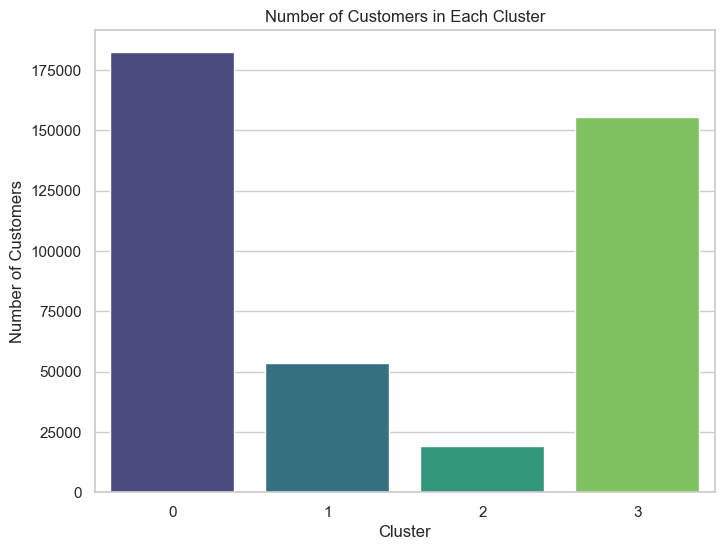

In [70]:
# Count the number of customers in each cluster
cluster_counts = data['Cluster'].value_counts()

# Plot the cluster sizes
plt.figure(figsize=(8, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')
plt.title('Number of Customers in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.show()


# 5. Conclusion



The K-Means clustering segmented customers into four clusters, each with distinct purchasing behaviors:

- **Cluster 0**: High-value customers with large total purchases and high average transaction amounts.
- **Cluster 1**: Medium-value customers with moderate purchases and transaction sizes.
- **Cluster 2**: Low-value customers, likely infrequent or small buyers.
- **Cluster 3**: Potentially occasional or casual buyers with minimal transactions.

These segments allow for targeted marketing and personalized offers, enabling better customer engagement and retention strategies.
